In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.shape


(99492, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [10]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [11]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [13]:
df['title'].nunique()

110

In [14]:
x=df['title'][0]
x

'EMS: BACK PAINS/INJURY'

In [15]:
x.split(":")

['EMS', ' BACK PAINS/INJURY']

In [16]:
x.split(":")[0]

'EMS'

In [17]:
def reason(title):
    return title.split(":")[0]

In [18]:
df.insert(4,"Reason",df['title'].apply(reason))
df.head()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [21]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Reason', ylabel='count'>

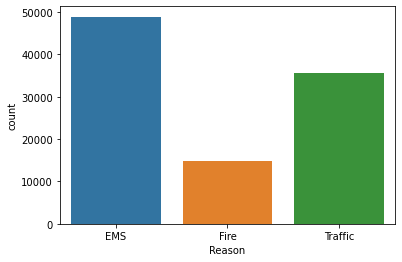

In [23]:
sns.countplot(x="Reason",data=df)

In [24]:
df['timeStamp'][0]

'2015-12-10 17:40:00'

In [25]:
type(df['timeStamp'][0])

str

In [28]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [29]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
x=df['timeStamp'][0]
x

Timestamp('2015-12-10 17:40:00')

In [33]:
x.year

2015

In [34]:
x.month

12

In [35]:
x.day_name()

'Thursday'

In [36]:
x.hour

17

In [37]:
#create 3 new columns Hour,Month and Day of week from the column timeStamp
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)

In [38]:
df.head()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17


In [39]:
df['Month']=df['timeStamp'].apply(lambda x:x.month)

In [42]:
df['Day']=df['timeStamp'].apply(lambda x:x.day_name())

In [43]:
df

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,11,8,Wednesday
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,11,8,Wednesday
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,11,8,Wednesday
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,11,8,Wednesday


<AxesSubplot:xlabel='Day', ylabel='count'>

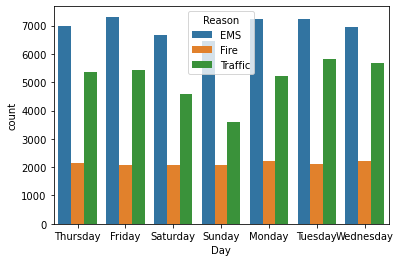

In [44]:
#create a countplot of day of week column with hue argument based of reason column
sns.countplot(x='Day',data=df,hue='Reason')

<AxesSubplot:xlabel='Month', ylabel='count'>

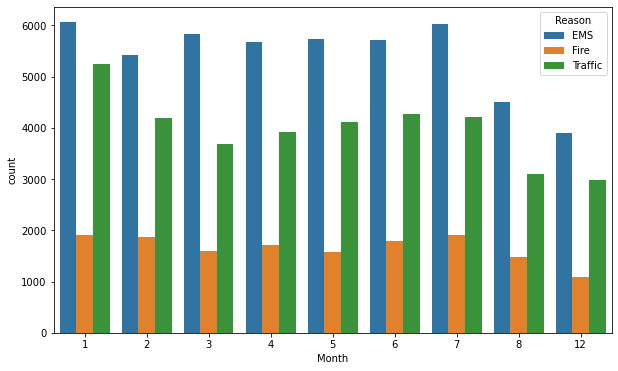

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(x='Month',data=df,hue='Reason')


In [49]:
#9,10,11 months are missing in countplot
df.groupby('Month')

In [50]:
bymonth=df.groupby('Month').count()
bymonth

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13205,13203,13096,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11467,11465,11396,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11101,11092,11059,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11326,11323,11283,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11423,11420,11378,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11786,11777,11732,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12137,12133,12088,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9078,9073,9025,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7969,7963,7916,7969,7969,7969


<AxesSubplot:xlabel='Month'>

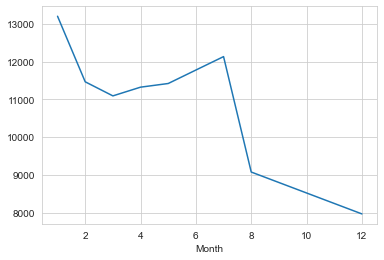

In [53]:
sns.set_style('whitegrid')
bymonth['twp'].plot()

In [56]:
df['Date']=df['timeStamp'].apply(lambda x:x.date())
df.head()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Day,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,Thursday,2015-12-10


In [57]:
bydate=df.groupby('Date').count()
bydate

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Day
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,115,113,115,115,115,115
2015-12-11,396,396,396,333,396,396,396,395,391,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,403,401,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,319,317,319,319,319,319
2015-12-14,447,447,447,387,447,447,447,446,445,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,328,327,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,357,352,357,357,357,357
2016-08-22,389,389,389,336,389,389,389,388,384,389,389,389,389


<AxesSubplot:xlabel='Date'>

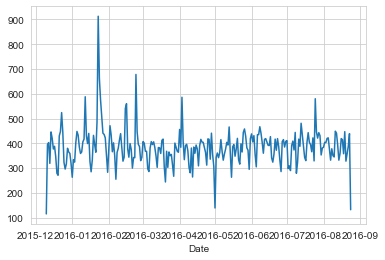

In [58]:
bydate['twp'].plot()

<AxesSubplot:xlabel='Date'>

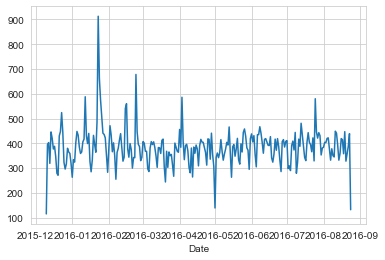

In [59]:
plt.tight_layout
bydate['twp'].plot()

In [60]:
df[df['Reason']=='EMS'].groupby('Date').count()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Day
Date,,,,,,,,,,,,,
2015-12-10,57,57,57,52,57,57,57,57,57,57,57,57,57
2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186
2015-12-12,189,189,189,171,189,189,189,189,189,189,189,189,189
2015-12-13,190,190,190,178,190,190,190,190,190,190,190,190,190
2015-12-14,222,222,222,201,222,222,222,222,222,222,222,222,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,159,159,159,139,159,159,159,159,159,159,159,159,159
2016-08-21,165,165,165,144,165,165,165,165,165,165,165,165,165
2016-08-22,182,182,182,163,182,182,182,182,182,182,182,182,182


In [61]:
df[df['Reason']=='Fire'].groupby('Date').count()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Day
Date,,,,,,,,,,,,,
2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15
2015-12-11,69,69,69,59,69,69,69,68,68,69,69,69,69
2015-12-12,68,68,68,53,68,68,68,68,68,68,68,68,68
2015-12-13,51,51,51,48,51,51,51,51,51,51,51,51,51
2015-12-14,39,39,39,36,39,39,39,38,39,39,39,39,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,52,52,52,47,52,52,52,52,52,52,52,52,52
2016-08-21,54,54,54,50,54,54,54,54,54,54,54,54,54
2016-08-22,51,51,51,46,51,51,51,50,50,51,51,51,51


In [62]:
df[df['Reason']=='Traffic'].groupby('Date').count()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Day
Date,,,,,,,,,,,,,
2015-12-10,43,43,43,35,43,43,43,43,41,43,43,43,43
2015-12-11,141,141,141,108,141,141,141,141,137,141,141,141,141
2015-12-12,146,146,146,109,146,146,146,146,144,146,146,146,146
2015-12-13,78,78,78,54,78,78,78,78,76,78,78,78,78
2015-12-14,186,186,186,150,186,186,186,186,184,186,186,186,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,117,117,117,93,117,117,117,117,116,117,117,117,117
2016-08-21,138,138,138,105,138,138,138,138,133,138,138,138,138
2016-08-22,156,156,156,127,156,156,156,156,152,156,156,156,156


<AxesSubplot:xlabel='Date'>

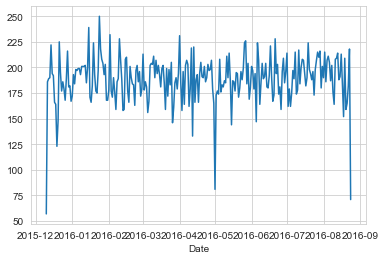

In [63]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()

<AxesSubplot:xlabel='Date'>

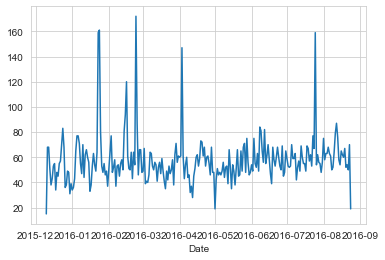

In [64]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()

<AxesSubplot:xlabel='Date'>

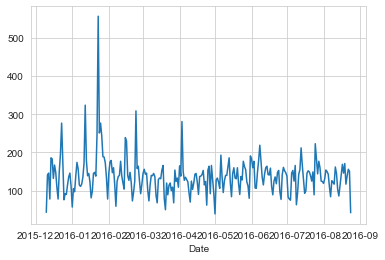

In [65]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()